# Hongfan Lu - Feb 26th - EDA (Video Transcripts vs Comments)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/yt-labeled.csv')
df.shape

(124704, 448)

In [5]:
# Subdividing columns into different dataframe
a = list(df.columns)

In [6]:
channel_video_info = a[:8] + ['video_id','video_genre'] # channel info

video_info_vader_txtblb = ['channel_name'] + a[8:38] # video info, vader and textblob scores
video_empath = ['channel_name', 'video_genre', 'video_id', 'video_title'] + a[38:232] # video transcript's empath keywords
video_perspective = ['channel_name', 'video_genre', 'video_id', 'video_title'] + ['video_toxicity', 'video_severe_toxicity', 'video_identity_attack', 'video_insult', 'video_profanity', 'video_threat'] # video transcript toxicity labelling

comment_info_vader_txtblb = ['channel_name', 'video_genre', 'video_id', 'video_title'] + a[232:254] # comment info, comment vader and textblob scores
comment_empath = ['channel_name', 'video_genre', 'video_id', 'video_title', 'comment_cleaned','comment_tokenized'] + a[243:] # comment transcript's empath keywords
comment_perspective = ['channel_name', 'video_genre', 'video_id', 'video_title','comment_author_id', 'comment_cleaned','comment_tokenized'] + ['comment_toxicity','comment_severe_toxicity', 'comment_identity_attack', 'comment_insult','comment_profanity', 'comment_threat'] #comment toxicity labeling

video_genre = a[19] # video genre (action/ non-action)

## 1. Dataframes for Channel level information

In [7]:
channel_video_info_df = df[channel_video_info]
channel_video_info_df = channel_video_info_df.drop_duplicates().reset_index(drop = True)
channel_video_info_df = channel_video_info_df.drop(['channel_description','channel_uploads_id'], axis = 1)
# channel_video_info_df.head(2)

## 2. Dataframes for Video Transcripts

### video_info_vader_txtblob_df: video information + vader + textblob

In [8]:
video_info_vader_txtblb_df = df[video_info_vader_txtblb]
# video_info_vader_txtblb_df.shape ## This contains a lot of duplicated rows
video_info_vader_txtblb_df = video_info_vader_txtblb_df.drop(['video_description', 'video_tags','video_subtitle_path'], axis = 1)
video_info_vader_txtblb_df = video_info_vader_txtblb_df.drop(['video_toxicity', 'video_severe_toxicity', 'video_identity_attack', 'video_insult', 'video_profanity', 'video_threat'], axis = 1) ## take out perspective api related features
video_info_vader_txtblb_df = video_info_vader_txtblb_df.drop_duplicates().reset_index(drop = True)
video_info_vader_txtblb_df.shape

(1301, 22)

In [9]:
# video_info_vader_txtblb_df.head(2)

### video_perspective_df : video infor + perspective api dimensions

In [10]:
video_perspective_df = df[video_perspective]
# video_perspective_df.head(2)

### video_empath_df: video info + empath keywords

In [11]:
video_empath_df = df[video_empath]
# video_empath_df.shape ## This contains a lot of duplicated rows
video_empath_df = video_empath_df.drop_duplicates().reset_index(drop = True)
video_empath_df.shape

(1301, 198)

In [12]:
# video_empath_df.head(2)

## 3. Dataframes for Comments

### comment_info_vader_txtblb_df: channel name + video info + comment info + text vader, textblob

In [13]:
comment_info_vader_txtblb_df = df[comment_info_vader_txtblb]
comment_info_vader_txtblb_df.duplicated().value_counts() # There is no duplicated value in comments section
comment_info_vader_txtblb_df = comment_info_vader_txtblb_df.drop(['comment_toxicity','comment_severe_toxicity', 'comment_identity_attack', 'comment_insult', 'comment_profanity', 'comment_threat'], axis = 1)
# comment_info_vader_txtblb_df.head(2)

### comment_perspective_df : comment info + perspective api labeling

In [14]:
comment_perspective_df = df[comment_perspective]
# comment_perspective_df.head()

### comment_empath_df: comment's empath keywords

In [15]:
comment_empath_df = df[comment_empath]
# comment_empath_df.head(2)

## 4. YouTube Transcript's Toxicity & Vader vs. Comment Section's

In [16]:
all_games = [
    "call of duty", "gta", "the last of us", "god of war", "batman", 
    "red dead redemption", "assassin's creed", "star wars jedi", 
    "resident evil", "cyberpunk", "fallout", "tomb raider", "elden ring",
    "minecraft", "pokemon go", "just dance", "it takes two", "uncharted",
    "brawl stars"]

In [17]:
video_info_vader_txtblb_df['video_title_lower'] = video_info_vader_txtblb_df['video_title'].str.lower()
video_info_vader_txtblb_df['game'] = video_info_vader_txtblb_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
video_info_vader_txtblb_df.drop(columns=['video_title_lower'], inplace=True)

In [18]:
video_perspective_df['video_title_lower'] = video_perspective_df['video_title'].str.lower()
video_perspective_df['game'] = video_perspective_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
video_perspective_df.drop(columns=['video_title_lower'], inplace=True)

/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/2605331000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_perspective_df['video_title_lower'] = video_perspective_df['video_title'].str.lower()
/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/2605331000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_perspective_df['game'] = video_perspective_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
/var

In [19]:
comment_perspective_df['video_title_lower'] = comment_perspective_df['video_title'].str.lower()
comment_perspective_df['game'] = comment_perspective_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
comment_perspective_df.drop(columns=['video_title_lower'], inplace=True)

/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/3451468008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_perspective_df['video_title_lower'] = comment_perspective_df['video_title'].str.lower()
/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/3451468008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_perspective_df['game'] = comment_perspective_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title

In [20]:
comment_info_vader_txtblb_df['video_title_lower'] = comment_info_vader_txtblb_df['video_title'].str.lower()
comment_info_vader_txtblb_df['game'] = comment_info_vader_txtblb_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
comment_info_vader_txtblb_df.drop(columns=['video_title_lower'], inplace=True)

In [21]:
video_sentiment_measures = ['video_neg','video_neu','video_pos','video_compound','video_polarity', 'video_subjectivity']
video_perspective_measures = ['video_toxicity', 'video_severe_toxicity', 'video_identity_attack', 'video_insult', 'video_profanity', 'video_threat']

In [22]:
comment_sentiment_measures = ['comment_neg','comment_neu','comment_pos','comment_compound','comment_polarity', 'comment_subjectivity']
comment_perspective_measures = ['comment_toxicity','comment_severe_toxicity', 'comment_identity_attack', 'comment_insult', 'comment_profanity', 'comment_threat']

### Comment Section's Toxicity by Game

In [23]:
game_toxicity_comment = comment_perspective_df.groupby('game')[comment_perspective_measures].mean().sort_values(by = 'comment_toxicity', ascending=False)

In [24]:
# game_toxicity_comment.head()

### YouTube Transcript's Toxicity by Game

In [25]:
game_toxicity = video_perspective_df.groupby('game')[video_perspective_measures].mean().sort_values(by = 'video_toxicity', ascending=False)

In [26]:
# game_toxicity.head()

In [27]:
vid_com_compby_game = pd.concat([game_toxicity['video_toxicity'],game_toxicity_comment['comment_toxicity']], axis = 1)
vid_com_compby_game.head()

,video_toxicity,comment_toxicity
game,,
"gta, pokemon go",0.519439,0.139283
resident evil,0.409663,0.161483
"star wars jedi, minecraft",0.404682,0.101355
"gta, minecraft",0.391238,0.084653
"batman, minecraft",0.377793,0.066857


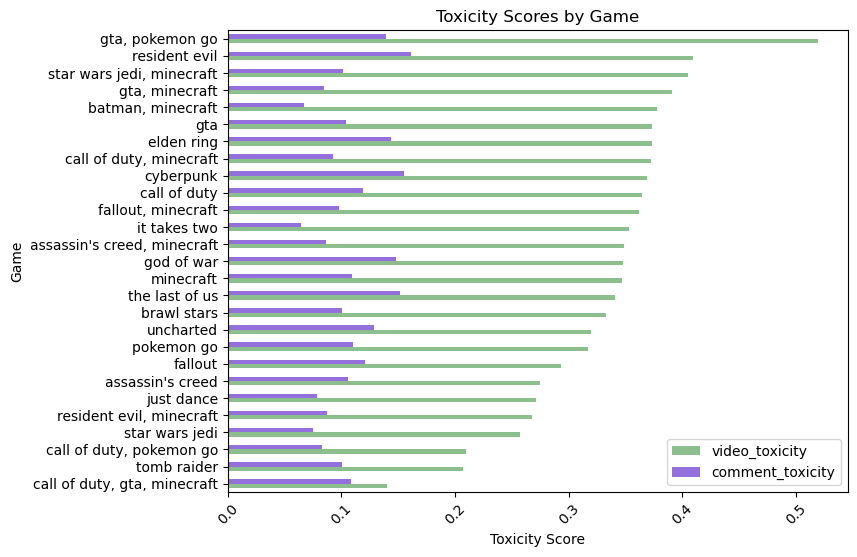

In [28]:
vid_com_compby_game_sorted = vid_com_compby_game.sort_values(by='video_toxicity')
vid_com_compby_game_sorted.plot(kind='barh', figsize=(8, 6), color=['#8DBE8D', '#9370DB'])
plt.title('Toxicity Scores by Game')
plt.xlabel('Toxicity Score')
plt.ylabel('Game')
plt.xticks(rotation=45)
plt.legend()
plt.show()

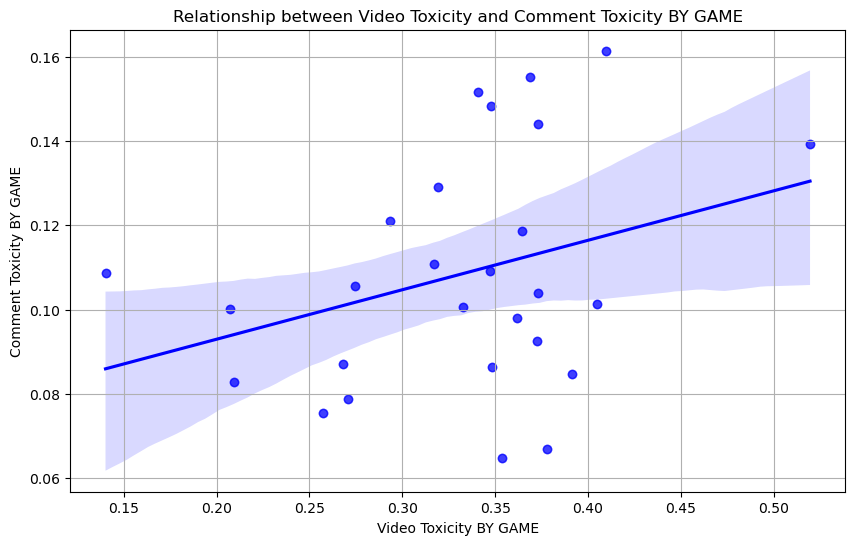

In [29]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='video_toxicity', y='comment_toxicity', data=vid_com_compby_game, color='blue', scatter_kws={'alpha':0.5})
plt.scatter(vid_com_compby_game['video_toxicity'], vid_com_compby_game['comment_toxicity'], color='blue', alpha=0.5)
plt.title('Relationship between Video Toxicity and Comment Toxicity BY GAME')
plt.xlabel('Video Toxicity BY GAME')
plt.ylabel('Comment Toxicity BY GAME')
plt.grid(True)
plt.show()

/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/2557649848.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vid_com_compby_game['video_toxicity'], shade=True, color='blue', label='Video Toxicity')
/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/2557649848.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vid_com_compby_game['comment_toxicity'], shade=True, color='green', label='Comment Toxicity')


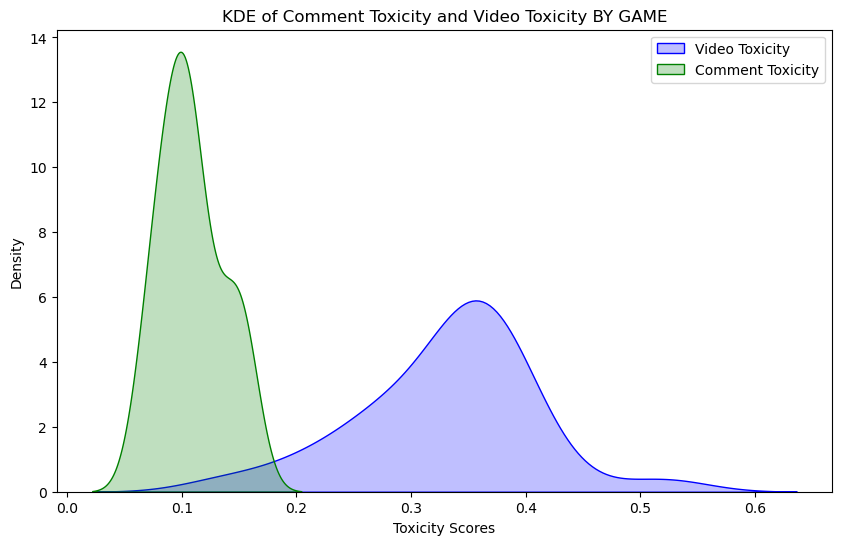

In [30]:
# KDE plot for video_toxicity
plt.figure(figsize=(10, 6))
sns.kdeplot(vid_com_compby_game['video_toxicity'], shade=True, color='blue', label='Video Toxicity')
sns.kdeplot(vid_com_compby_game['comment_toxicity'], shade=True, color='green', label='Comment Toxicity')
plt.title('KDE of Comment Toxicity and Video Toxicity BY GAME')
plt.xlabel('Toxicity Scores')
plt.ylabel('Density')
plt.legend()
plt.show()

There are a few observations from two plots above:

1. There is a positive relationship among video transcripts toxicity and comment section toxicity when grouped BY GAME
2. This means that some games are indeed more toxic than the other;
3. This fact is observed, INDEPENDENT of YouTuber's individual effect on comment sections

## Toxicity by Channel

In [31]:
channel_toxicity_transcript = video_perspective_df.groupby('channel_name')[['video_toxicity', 'video_severe_toxicity', 'video_identity_attack', 'video_insult', 'video_profanity', 'video_threat']].mean().sort_values(by = 'video_toxicity', ascending=False)

In [32]:
channel_toxicity_comment = comment_perspective_df.groupby('channel_name')[['comment_toxicity','comment_severe_toxicity', 'comment_identity_attack', 'comment_insult', 'comment_profanity', 'comment_threat']].mean().sort_values(by = 'comment_toxicity', ascending=False)

In [33]:
vid_com_compby_channel = pd.concat([channel_toxicity_transcript['video_toxicity'],channel_toxicity_comment['comment_toxicity']], axis = 1)
vid_com_compby_channel.head()

,video_toxicity,comment_toxicity
channel_name,,
IShowSpeed,0.536955,0.165640
PewDiePie,0.432739,0.172895
VanossGaming,0.424747,0.112142
Caylus,0.423710,0.082007
LazarBeam,0.419631,0.135905


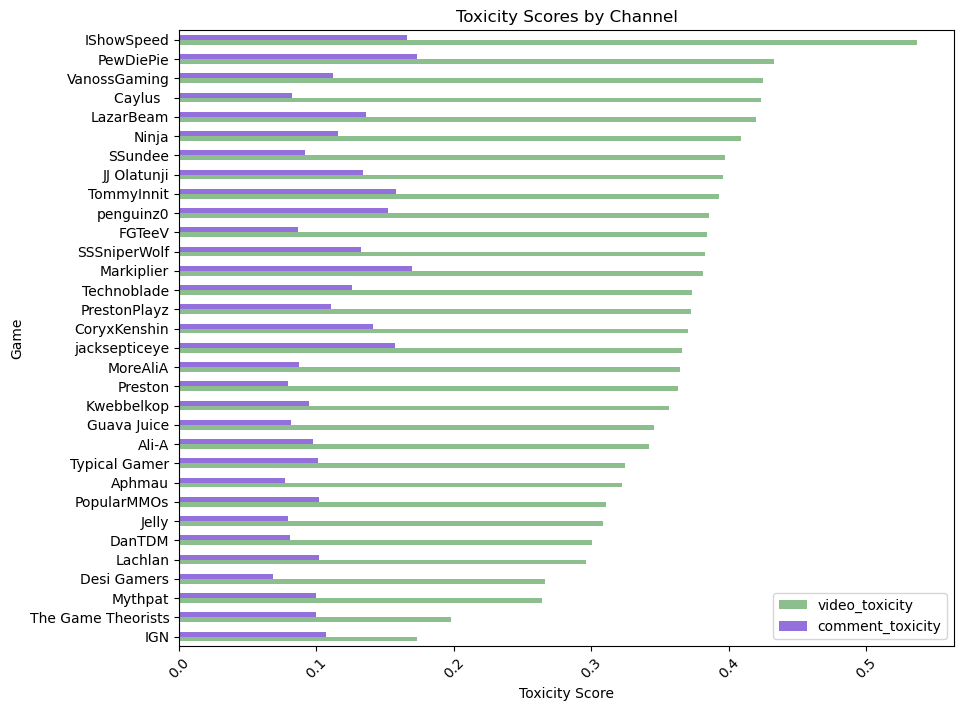

In [34]:
vid_com_compby_channel_sorted = vid_com_compby_channel.sort_values(by='video_toxicity')
vid_com_compby_channel_sorted.plot(kind='barh', figsize=(10, 8), color=['#8DBE8D', '#9370DB'])
plt.title('Toxicity Scores by Channel')
plt.xlabel('Toxicity Score')
plt.ylabel('Game')
plt.xticks(rotation=45)
plt.legend()
plt.show()

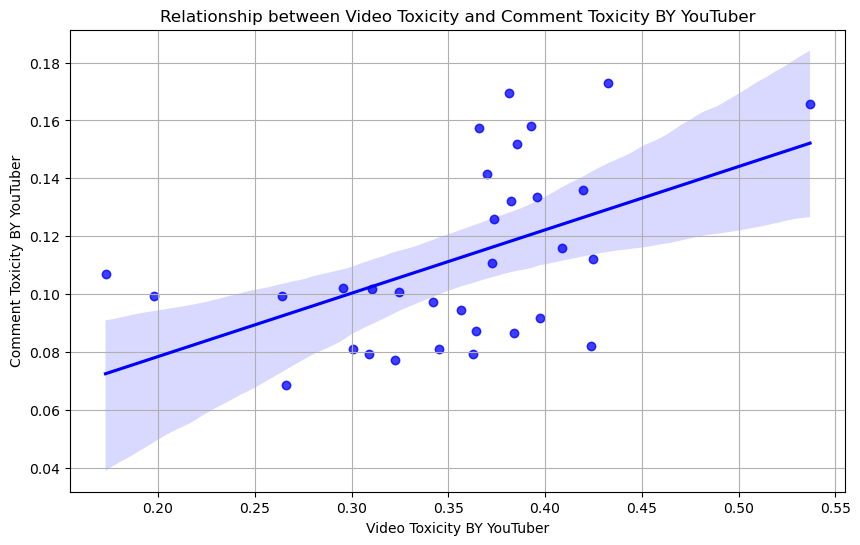

In [35]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='video_toxicity', y='comment_toxicity', data=vid_com_compby_channel, color='blue', scatter_kws={'alpha':0.5})
plt.scatter(vid_com_compby_channel['video_toxicity'], vid_com_compby_channel['comment_toxicity'], color='blue', alpha=0.5)
plt.title('Relationship between Video Toxicity and Comment Toxicity BY YouTuber')
plt.xlabel('Video Toxicity BY YouTuber')
plt.ylabel('Comment Toxicity BY YouTuber')
plt.grid(True)
plt.show()

/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/1501391299.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vid_com_compby_channel['video_toxicity'], shade=True, color='blue', label='Video Toxicity')
/var/folders/k3/wh4jzwxx6gq481f_37rdz5bc0000gn/T/ipykernel_30055/1501391299.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vid_com_compby_channel['comment_toxicity'], shade=True, color='green', label='Comment Toxicity')


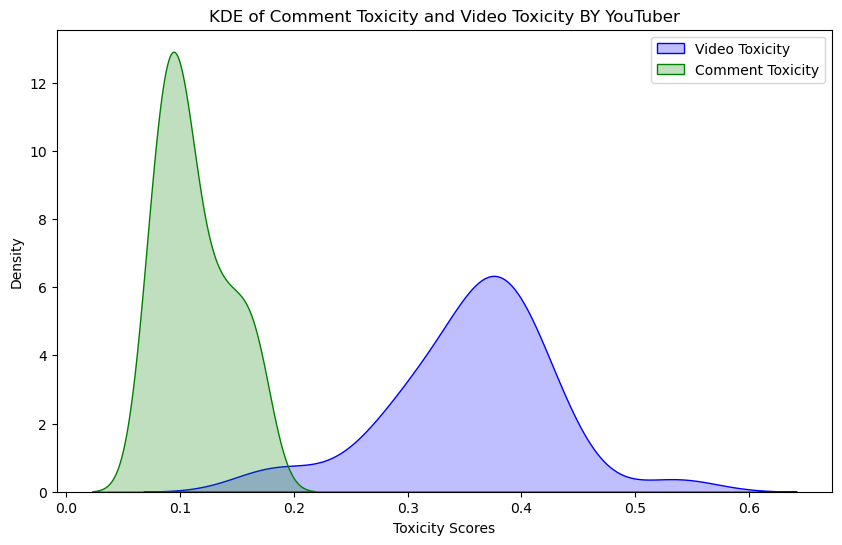

In [36]:
# KDE plot for video_toxicity
plt.figure(figsize=(10, 6))
sns.kdeplot(vid_com_compby_channel['video_toxicity'], shade=True, color='blue', label='Video Toxicity')
sns.kdeplot(vid_com_compby_channel['comment_toxicity'], shade=True, color='green', label='Comment Toxicity')
plt.title('KDE of Comment Toxicity and Video Toxicity BY YouTuber')
plt.xlabel('Toxicity Scores')
plt.ylabel('Density')
plt.legend()
plt.show()

There are a few observations from two plots above:

1. The scatter plot is showing a much denser pattern between transcripts and comment section when we group by channel:
2. This tells us that each youtuber's expressions, word uses and his or her presence are likely to be more explanatory for the toxicity correlations.

## Investigating Why different YouTuber has different Toxicity Means?

In [37]:
video_info_vader_txtblb_df.columns

Index(['channel_name', 'video_id', 'video_title', 'video_creation_time',
       'video_duration', 'video_viewcount', 'video_likecount',
       'video_commentcount', 'video_live', 'video_genre', 'video_game',
       'video_wordcount', 'video_blocked_wordcount',
       'video_blocked_proportion', 'video_speed', 'video_language',
       'video_neg', 'video_neu', 'video_pos', 'video_compound',
       'video_polarity', 'video_subjectivity', 'game'],
      dtype='object')

In [38]:
video_info = video_info_vader_txtblb_df[['channel_name', 'video_id', 'video_title',
       'video_creation_time', 'video_duration', 'video_viewcount',
       'video_likecount', 'video_commentcount', 'video_live', 'video_genre',
       'video_game', 'video_wordcount', 'video_blocked_wordcount',
       'video_blocked_proportion', 'video_speed', 'video_language']]

In [39]:
video_info.head(2)

,channel_name,video_id,video_title,video_creation_time,video_duration,video_viewcount,video_likecount,video_commentcount,video_live,video_genre,video_game,video_wordcount,video_blocked_wordcount,video_blocked_proportion,video_speed,video_language
0,PewDiePie,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,3227.0,11590164,474052,15146.0,False,action,elden ring,8913,32,0.003590,2.762008,['en']
1,PewDiePie,PV4NGwn_xdI,Elden Ring #1 - 0 DEATH PLAYTHROUGH,2022-02-24 15:00:10+00:00,818.0,5179366,192101,4313.0,False,action,elden ring,1607,19,0.011823,1.964548,['en']


In [40]:
# Pivot to calculate unique count of video titles for each channel and genre
count_vid_by_channel_genre = video_info.pivot_table(index='channel_name', columns='video_genre', values='video_title', aggfunc='nunique', fill_value=0).reset_index()

# Rename columns for clarity
count_vid_by_channel_genre.rename(columns={'action': 'action_count', 'non-action': 'non_action_count'}, inplace=True)

In [41]:
count_vid_by_channel_genre.head(3)

video_genre,channel_name,action_count,non_action_count
0,Ali-A,28,7
1,Aphmau,1,30
2,Caylus,29,30


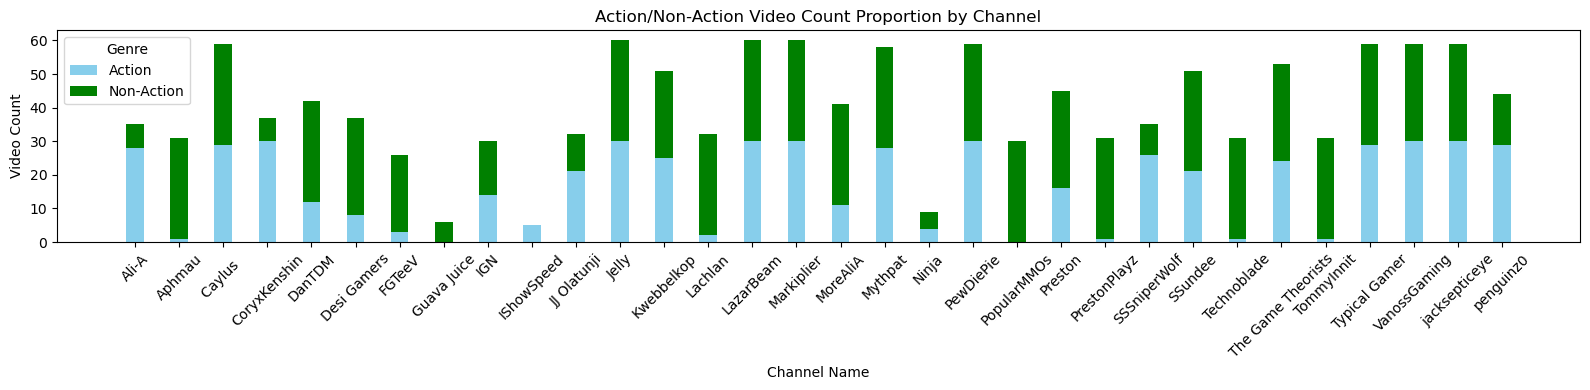

In [42]:
plt.figure(figsize=(16, 4))

# Plot action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['action_count'], color='skyblue', width=0.4, label='Action')

# Plot non-action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['non_action_count'], color='green', width=0.4, label='Non-Action', bottom = count_vid_by_channel_genre['action_count'])

# Adding labels and title
plt.xlabel('Channel Name')
plt.ylabel('Video Count')
plt.title('Action/Non-Action Video Count Proportion by Channel')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
count_vid_by_channel_genre['action_video_%'] = round(100*(count_vid_by_channel_genre['action_count']/(count_vid_by_channel_genre['action_count']+ count_vid_by_channel_genre['non_action_count'])),2)

In [44]:
# count_vid_by_channel_genre = count_vid_by_channel_genre.merge(channel_toxicity['toxicity'], left_on= 'channel_name', right_index=True,how = 'left')

In [45]:
count_vid_by_channel_genre = count_vid_by_channel_genre.sort_values(by = 'action_video_%', ascending = False).reset_index(drop = True)

In [46]:
count_vid_by_channel_genre = count_vid_by_channel_genre.reset_index(drop = False)

In [47]:
count_vid_by_channel_genre = count_vid_by_channel_genre.rename(columns = {'index' : 'Action-Video % Ranking'})

In [48]:
vid_com_compby_channel['ratio'] = vid_com_compby_channel['comment_toxicity']/vid_com_compby_channel['video_toxicity']

In [49]:
vid_com_compby_channel = vid_com_compby_channel.sort_values(by = 'ratio', ascending = False).reset_index(drop = False)

In [50]:
vid_com_compby_channel = vid_com_compby_channel.reset_index(drop = False)

In [51]:
vid_com_compby_channel = vid_com_compby_channel.rename(columns = {'index' : 'YouTuber vs. Commentsection Toxic Ranking'})

In [52]:
ranks_compare = pd.merge(count_vid_by_channel_genre,vid_com_compby_channel, on = 'channel_name')

In [53]:
ranks_compare.head()

,Action-Video % Ranking,channel_name,action_count,non_action_count,action_video_%,YouTuber vs. Commentsection Toxic Ranking,video_toxicity,comment_toxicity,ratio
0,0,IShowSpeed,5,0,100.00,16,0.536955,0.165640,0.308481
1,1,CoryxKenshin,30,7,81.08,7,0.370231,0.141357,0.381807
2,2,Ali-A,28,7,80.00,18,0.341910,0.097458,0.285039
3,3,SSSniperWolf,26,9,74.29,9,0.382578,0.132293,0.345794
4,4,penguinz0,29,15,65.91,6,0.385699,0.151992,0.394069


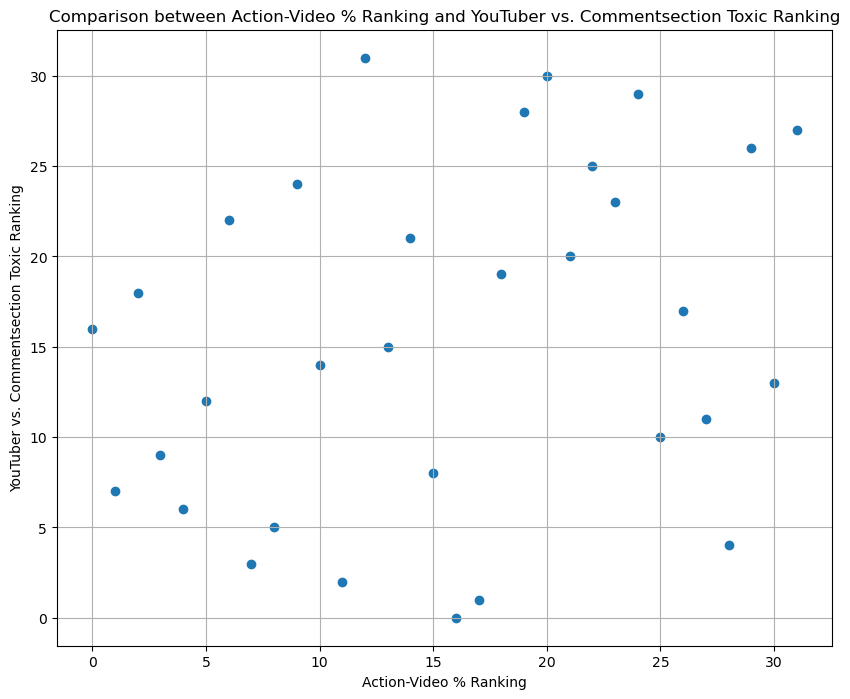

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(ranks_compare['Action-Video % Ranking'], ranks_compare['YouTuber vs. Commentsection Toxic Ranking'])
plt.xlabel('Action-Video % Ranking')
plt.ylabel('YouTuber vs. Commentsection Toxic Ranking')
plt.title('Comparison between Action-Video % Ranking and YouTuber vs. Commentsection Toxic Ranking')
plt.grid(True)
plt.show()

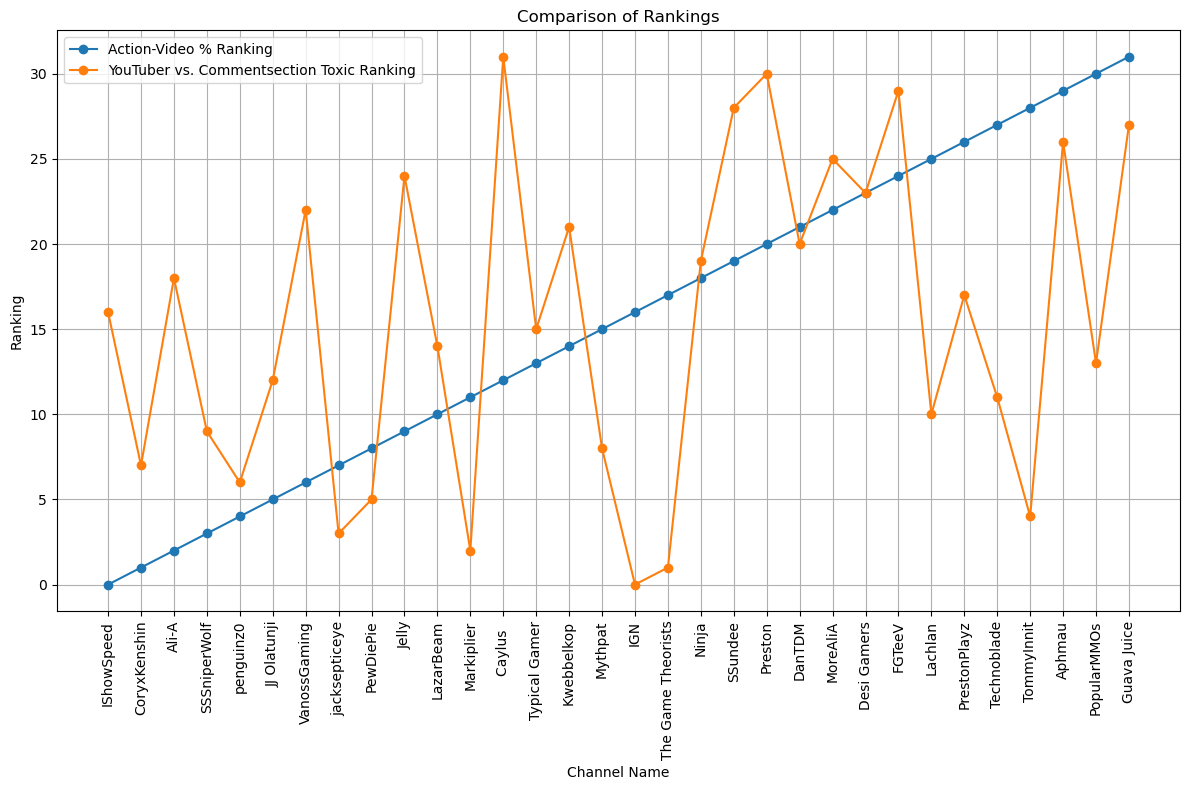

In [55]:
plt.figure(figsize=(12, 8))
# Plotting the first line plot (Action-Video % Ranking)
plt.plot(ranks_compare['channel_name'], ranks_compare['Action-Video % Ranking'], marker='o', label='Action-Video % Ranking')

# Plotting the second line plot (YouTuber vs. Commentsection Toxic Ranking)
plt.plot(ranks_compare['channel_name'], ranks_compare['YouTuber vs. Commentsection Toxic Ranking'], marker='o', label='YouTuber vs. Commentsection Toxic Ranking')

# Adding labels and title
plt.xlabel('Channel Name')
plt.ylabel('Ranking')
plt.title('Comparison of Rankings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Topic distribution in videos of different toxic levels

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

video_labeled_data = pd.read_csv("../data/video-labeled.csv")

In [219]:
video_labeled_data.head(2)

,channel_id,video_id,video_title,video_creation_time,video_description,video_duration,video_tags,video_viewcount,video_likecount,video_commentcount,...,video_weapon,video_children,video_monster,video_ocean,video_giving,video_contentment,video_writing,video_rural,video_positive_emotion,video_musical
0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,🌏 Get exclusive NordVPN deal here ➵ https://N...,3227.0,"['pewdiepie', 'pewds', 'pewdie']",11590164,474052,15146.0,...,0.019148,0.013102,0.002771,0.000756,0.009070,0.001512,0.001260,0.001764,0.017889,0.005291
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PV4NGwn_xdI,Elden Ring #1 - 0 DEATH PLAYTHROUGH,2022-02-24 15:00:10+00:00,NEW animated wallpapers on GX 👇👇👇\nhttps://ope...,818.0,"['pewdiepie', 'pewds', 'pewdie', 'elden ring',...",5179366,192101,4313.0,...,0.012453,0.022416,0.002491,0.012453,0.008717,0.000000,0.001245,0.002491,0.022416,0.007472


In [221]:
sorted_video_data = video_labeled_data.sort_values(by=["video_toxicity"])
sorted_video_data["video_toxicity"]

373    0.026146
971    0.041173
972    0.048902
963    0.051316
335    0.055668
         ...   
26     0.712583
869    0.717606
27     0.765616
29     0.809701
28     0.810352
Name: video_toxicity, Length: 1307, dtype: float64

In [222]:
num_videos_to_analyze = 100
lowest_toxicity_indices = list(sorted_video_data.index[:num_videos_to_analyze])
highest_toxicity_indices = list(sorted_video_data.index[-num_videos_to_analyze:])

In [223]:
print(lowest_toxicity_indices)
print(highest_toxicity_indices)

[373, 971, 972, 963, 335, 341, 401, 967, 960, 961, 900, 965, 343, 270, 901, 287, 481, 345, 895, 333, 957, 271, 338, 336, 277, 919, 1203, 291, 282, 272, 906, 915, 339, 968, 342, 964, 970, 969, 910, 896, 904, 903, 909, 905, 180, 1217, 914, 1254, 279, 283, 892, 891, 926, 1123, 400, 285, 959, 278, 1229, 751, 498, 668, 473, 601, 916, 898, 462, 966, 276, 743, 268, 1271, 495, 289, 659, 286, 505, 912, 399, 762, 274, 657, 924, 510, 1261, 516, 649, 332, 1250, 1219, 911, 897, 334, 1067, 863, 907, 682, 1225, 1209, 470]
[1178, 230, 761, 1176, 741, 226, 311, 1040, 183, 560, 787, 465, 446, 947, 626, 1278, 839, 242, 151, 1039, 721, 59, 172, 720, 437, 75, 952, 125, 171, 1078, 1041, 1183, 239, 949, 455, 789, 253, 724, 25, 364, 1188, 451, 483, 445, 240, 603, 229, 161, 609, 434, 1, 448, 153, 831, 471, 478, 261, 145, 147, 248, 444, 24, 1242, 951, 1174, 1246, 251, 650, 221, 80, 1055, 224, 77, 266, 378, 233, 243, 440, 1277, 231, 1180, 254, 1190, 60, 1238, 552, 257, 232, 83, 377, 85, 1189, 71, 1184, 1056, 26,

In [224]:
def extract_keywords_for_dataset(dataset, num_keywords=10):
    average_score_by_keyword = {}
    
    for key_name in list(dataset.columns)[35:]:
        average_score_by_keyword[key_name] = np.mean(dataset[key_name])
    average_score_by_keyword_sorted = sorted(average_score_by_keyword.items(), key=lambda x: x[1], reverse=True)
    return dict([(_[0], _[1]) for _ in average_score_by_keyword_sorted[:num_keywords]])

In [225]:
## select top 10 keywords in the most toxic videos

highest_toxicity_dataset = sorted_video_data.loc[highest_toxicity_indices]
highest_toxicity = extract_keywords_for_dataset(highest_toxicity_dataset, num_keywords=10)
highest_toxicity_df = pd.DataFrame(list(highest_toxicity.items()), columns=['Metric', 'Value'])
highest_toxicity_df

,Metric,Value
0,video_negative_emotion,0.040546
1,video_violence,0.020342
2,video_weapon,0.018313
3,video_pain,0.015017
4,video_movement,0.014135
5,video_kill,0.014123
6,video_play,0.013413
7,video_masculine,0.013315
8,video_divine,0.013072
9,video_death,0.013034


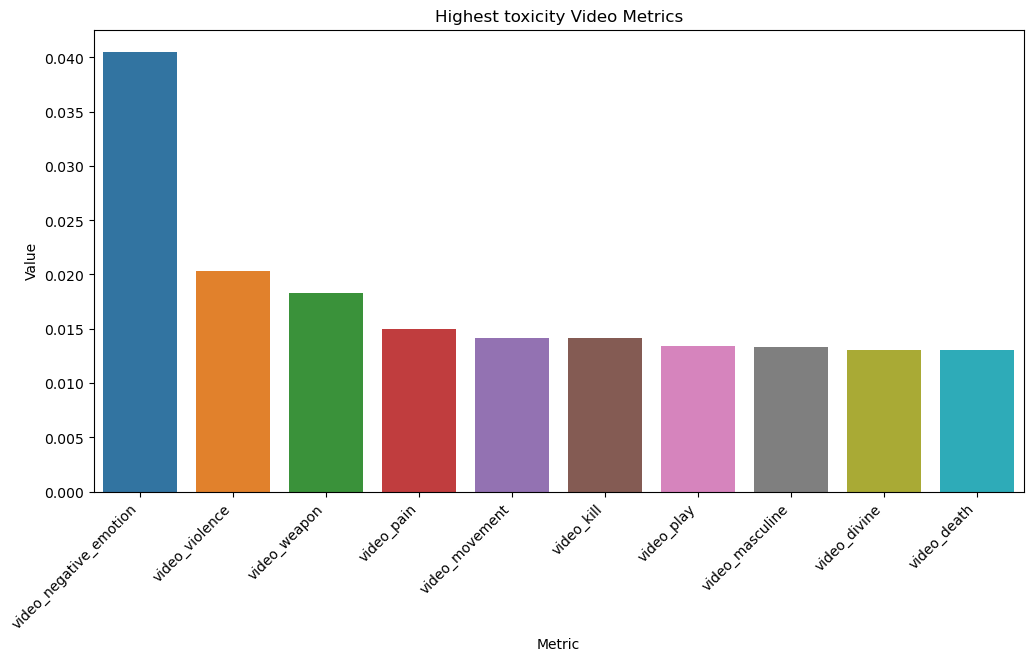

In [226]:
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_toxicity_df.Metric, y=highest_toxicity_df.Value)
plt.xticks(rotation=45, ha='right')
plt.title('Highest toxicity Video Metrics')
plt.show()

In [227]:
## select top 10 keywords in the least toxic videos
lowest_toxicity_dataset = sorted_video_data.loc[lowest_toxicity_indices]

lowest_toxicity = extract_keywords_for_dataset(lowest_toxicity_dataset, num_keywords=10)

lowest_toxicity_df = pd.DataFrame(list(lowest_toxicity.items()), columns=['Metric', 'Value'])
lowest_toxicity_df

,Metric,Value
0,video_musical,0.021957
1,video_listen,0.021735
2,video_music,0.021385
3,video_fun,0.020187
4,video_art,0.019522
5,video_hearing,0.019409
6,video_dance,0.017013
7,video_sound,0.016745
8,video_noise,0.016113
9,video_negative_emotion,0.015722


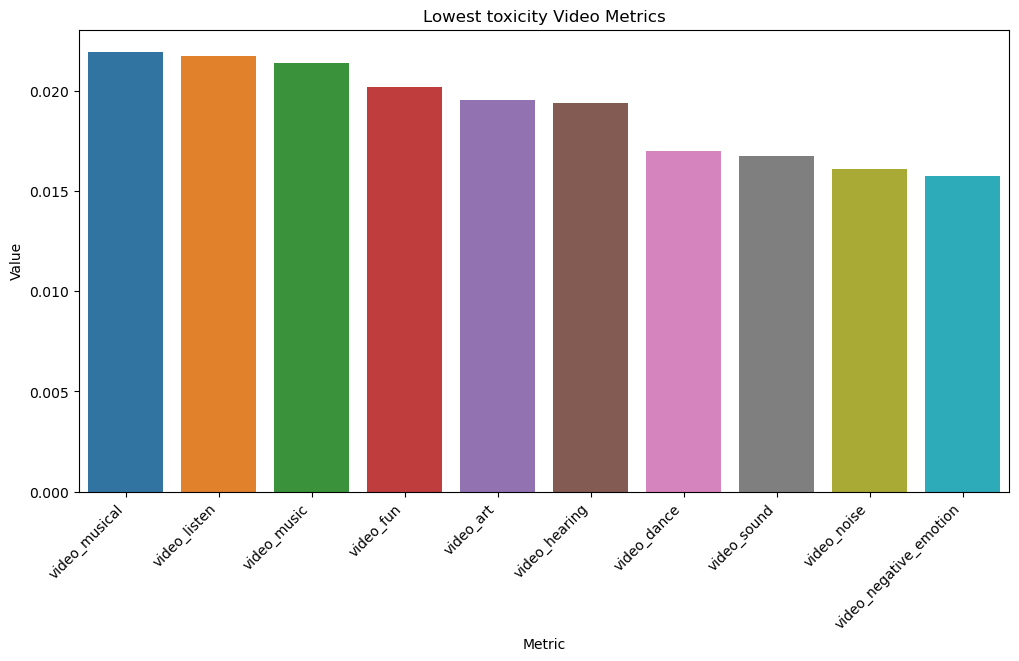

In [228]:
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_toxicity_df.Metric, y=lowest_toxicity_df.Value)
plt.xticks(rotation=45, ha='right')
plt.title('Lowest toxicity Video Metrics')
plt.show()

## Genre distribution in videos of different transcript toxic level

In [229]:
toxic_game_counts=video_labeled_data.loc[highest_toxicity_indices]['video_genre'].value_counts()
top_toxicity_video_actionPercentage = toxic_game_counts['action']/len(highest_toxicity_indices)
top_toxicity_video_actionPercentage

0.6

In [230]:
toxic_game_counts

video_genre
action        60
non-action    40
Name: count, dtype: int64

In [231]:
non_toxic_game_counts = video_labeled_data.loc[lowest_toxicity_indices]['video_genre'].value_counts()
least_toxicity_video_actionPercentage =  non_toxic_game_counts['action']/len(lowest_toxicity_indices)
least_toxicity_video_actionPercentage

0.41

In [232]:
non_toxic_game_counts

video_genre
non-action    59
action        41
Name: count, dtype: int64

Text(0, 0.5, 'Count')

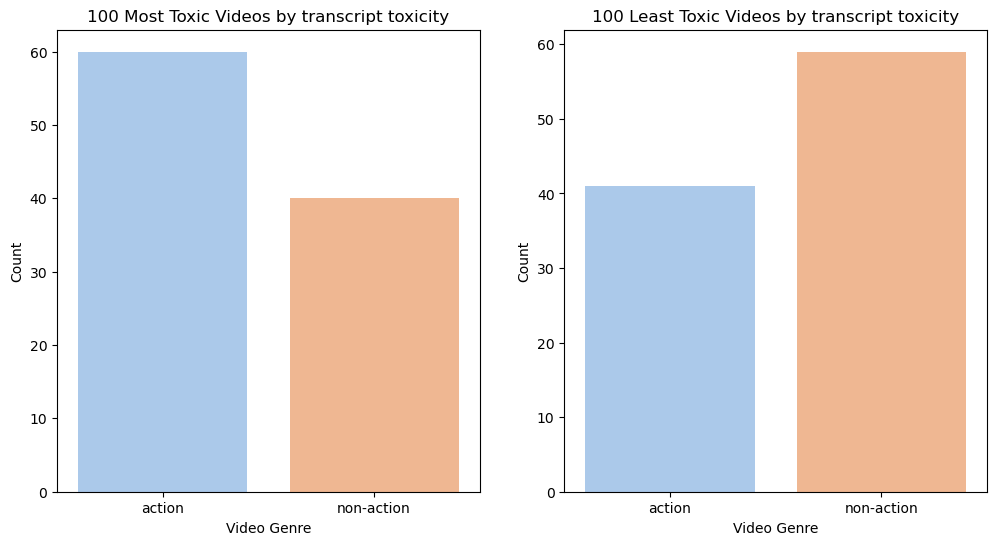

In [234]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
order = ['action', 'non-action']

sns.countplot(x='video_genre', data=highest_toxicity_dataset, ax=axes[0], palette='pastel',order=order)
axes[0].set_title('100 Most Toxic Videos by transcript toxicity')
axes[0].set_xlabel('Video Genre')
axes[0].set_ylabel('Count')


sns.countplot(x='video_genre', data=lowest_toxicity_dataset, ax=axes[1], palette='pastel',order=order)
axes[1].set_title('100 Least Toxic Videos by transcript toxicity')
axes[1].set_xlabel('Video Genre')
axes[1].set_ylabel('Count')

## Genre Distribution in videos of different commentSection toxic level

In [235]:
## using yt-labeled
commentSection_toxicity = df.groupby("video_id")["comment_toxicity"].mean()

# Sort the results
sorted_toxicity = commentSection_toxicity.sort_values(ascending=False)
sorted_toxicity

video_id
dgw9o2a39Q0    0.274285
-ZC-kWwy6ks    0.262422
9OZqnGyDgBM    0.260356
Gwmp_-EP75Q    0.259687
wh_DVuMWhBs    0.258403
                 ...   
Cz7sJp-MGZc    0.033680
7EsfLP6Eel8    0.033528
bWNjH6LxTug    0.033397
iIMsngFe3l4    0.032950
HtTu4FnOsxM    0.029131
Name: comment_toxicity, Length: 1301, dtype: float64

In [236]:
top_100_video_ids = sorted_toxicity.head(100)
top_100_video_ids_list = top_100_video_ids.index.tolist()

least_100_video_ids= sorted_toxicity.tail(100)
least_100_video_ids_list = least_100_video_ids.index.tolist()

In [237]:
top_100_df = video_labeled_data[video_labeled_data['video_id'].isin(top_100_video_ids_list)]

# Count the occurrences of each video category
category_counts = top_100_df['video_genre'].value_counts()

# Display the counts
print(category_counts)

video_genre
action        55
non-action    45
Name: count, dtype: int64


In [238]:
least_100_df = video_labeled_data[video_labeled_data['video_id'].isin(least_100_video_ids_list)]

# Count the occurrences of each video category
category_counts = least_100_df['video_genre'].value_counts()

# Display the counts
print(category_counts)

video_genre
non-action    63
action        37
Name: count, dtype: int64


Text(0, 0.5, 'Count')

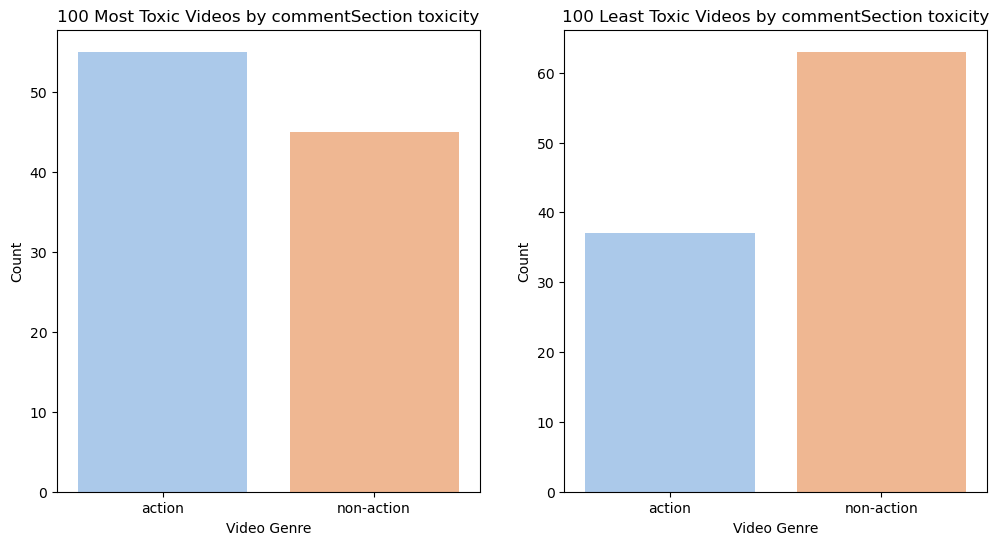

In [244]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
order = ['action', 'non-action']

sns.countplot(x='video_genre', data=top_100_df, ax=axes[0], palette='pastel',order=order)
axes[0].set_title('100 Most Toxic Videos by commentSection toxicity')
axes[0].set_xlabel('Video Genre')
axes[0].set_ylabel('Count')


sns.countplot(x='video_genre', data=least_100_df, ax=axes[1], palette='pastel',order=order)
axes[1].set_title('100 Least Toxic Videos by commentSection toxicity')
axes[1].set_xlabel('Video Genre')
axes[1].set_ylabel('Count')

In [ ]:
## topics in most toxic videos by Comment section

## Video-level comment toxicity distribution

In [248]:
avg_comment_toxicity_by_video = df.groupby('video_id')['comment_toxicity'].mean().reset_index()

In [249]:
avg_comment_toxicity_by_video

,video_id,comment_toxicity
0,-0h5CX83r3s,0.062127
1,-3zzJ9fxhhU,0.078417
2,-D3gRhe8AhY,0.096161
3,-H2BMxIasUk,0.100276
4,-PDgINPm-9o,0.128629
...,...,...
1296,zgazs4mzOe4,0.132639
1297,zlj1_qwiekM,0.189419
1298,zmr3tVJtNXc,0.118989
1299,znbHraYARsI,0.088224


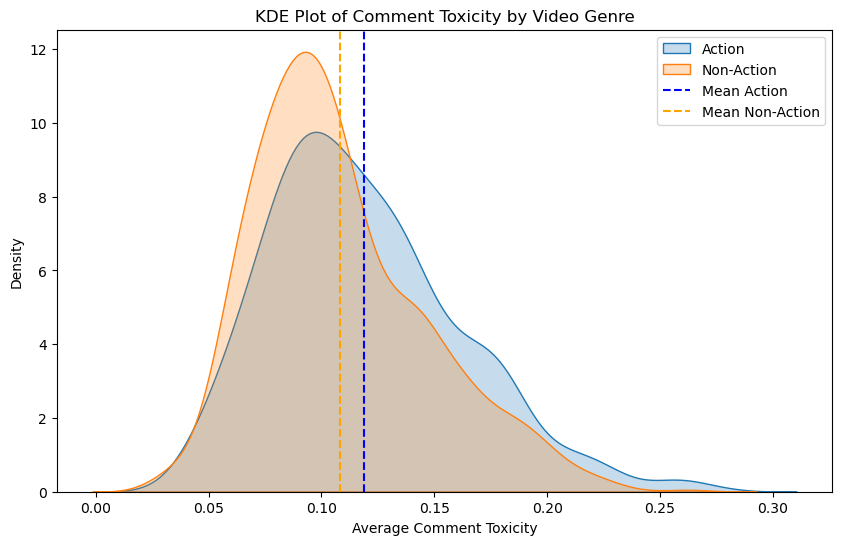

In [263]:

action_data = avg_comment_toxicity_by_video[avg_comment_toxicity_by_video['video_id'].isin(df[df['video_genre'] == 'action']['video_id'])]
non_action_data = avg_comment_toxicity_by_video[avg_comment_toxicity_by_video['video_id'].isin(df[df['video_genre'] == 'non-action']['video_id'])]


plt.figure(figsize=(10, 6))


sns.kdeplot(action_data['comment_toxicity'], label='Action', fill=True)

sns.kdeplot(non_action_data['comment_toxicity'], label='Non-Action', fill=True)


mean_action = action_data['comment_toxicity'].mean()
mean_non_action = non_action_data['comment_toxicity'].mean()

plt.axvline(x=mean_action, color='blue', linestyle='--', label='Mean Action')
plt.axvline(x=mean_non_action, color='orange', linestyle='--', label='Mean Non-Action')

plt.title('KDE Plot of Comment Toxicity by Video Genre')
plt.xlabel('Average Comment Toxicity')
plt.ylabel('Density')
plt.legend()
plt.show()

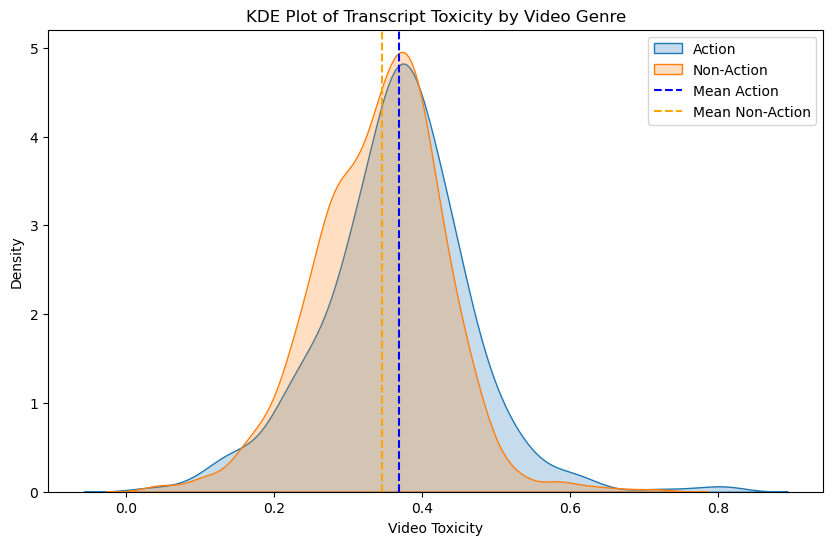

In [261]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=video_labeled_data[video_labeled_data['video_genre'] == 'action'], x='video_toxicity', label='Action', fill=True)


sns.kdeplot(data=video_labeled_data[video_labeled_data['video_genre'] == 'non-action'], x='video_toxicity', label='Non-Action', fill=True)


mean_action = df[df['video_genre'] == 'action']['video_toxicity'].mean()
mean_non_action = df[df['video_genre'] == 'non-action']['video_toxicity'].mean()

plt.axvline(x=mean_action, color='blue', linestyle='--', label='Mean Action')
plt.axvline(x=mean_non_action, color='orange', linestyle='--', label='Mean Non-Action')

plt.title('KDE Plot of Transcript Toxicity by Video Genre')
plt.xlabel('Video Toxicity')
plt.ylabel('Density')
plt.legend()
plt.show()

In [257]:
avg_comment_polarity_by_video = df.groupby('video_id')['comment_polarity'].mean().reset_index()

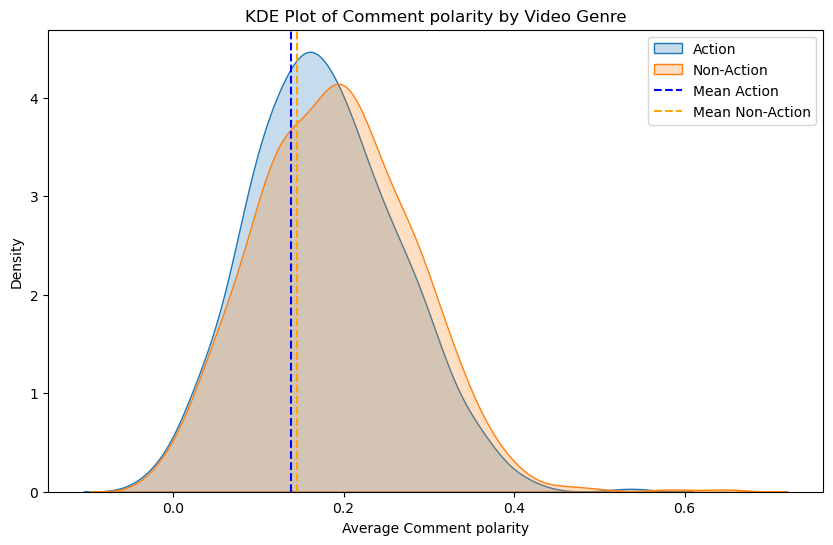

In [260]:

action_data = avg_comment_polarity_by_video[avg_comment_polarity_by_video['video_id'].isin(df[df['video_genre'] == 'action']['video_id'])]
non_action_data = avg_comment_polarity_by_video[avg_comment_polarity_by_video['video_id'].isin(df[df['video_genre'] == 'non-action']['video_id'])]


plt.figure(figsize=(10, 6))


sns.kdeplot(action_data['comment_polarity'], label='Action', fill=True)

sns.kdeplot(non_action_data['comment_polarity'], label='Non-Action', fill=True)

# 添加均值线
mean_action = df[df['video_genre'] == 'action']['video_polarity'].mean()
mean_non_action = df[df['video_genre'] == 'non-action']['video_polarity'].mean()

plt.axvline(x=mean_action, color='blue', linestyle='--', label='Mean Action')
plt.axvline(x=mean_non_action, color='orange', linestyle='--', label='Mean Non-Action')


plt.title('KDE Plot of Comment polarity by Video Genre')
plt.xlabel('Average Comment polarity')
plt.ylabel('Density')
plt.legend()
plt.show()

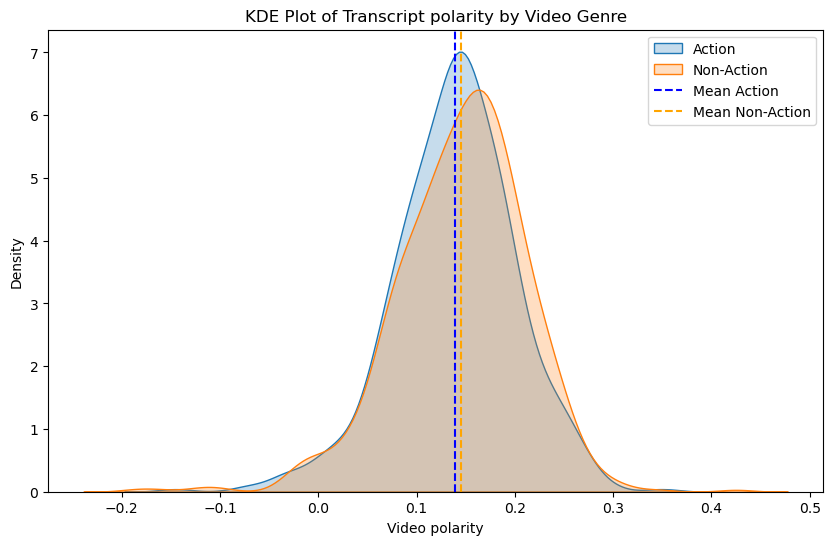

In [262]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=video_labeled_data[video_labeled_data['video_genre'] == 'action'], x='video_polarity', label='Action', fill=True)


sns.kdeplot(data=video_labeled_data[video_labeled_data['video_genre'] == 'non-action'], x='video_polarity', label='Non-Action', fill=True)


mean_action = df[df['video_genre'] == 'action']['video_polarity'].mean()
mean_non_action = df[df['video_genre'] == 'non-action']['video_polarity'].mean()

plt.axvline(x=mean_action, color='blue', linestyle='--', label='Mean Action')
plt.axvline(x=mean_non_action, color='orange', linestyle='--', label='Mean Non-Action')

plt.title('KDE Plot of Transcript polarity by Video Genre')
plt.xlabel('Video polarity')
plt.ylabel('Density')
plt.legend()
plt.show()